In [ ]:
#LeNet
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size = 5, padding = 2)
        self.pool = nn.AvgPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size = 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
batch_size = 256
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5))])

fashion_mnist_trainval = FashionMNIST("FashionMNIST", train=True, download=True, transform=transform)
fashion_mnist_test = FashionMNIST("FashionMNIST", train=False, download=True, transform=transform)

n_samples = len(fashion_mnist_trainval) 
train_size = int(len(fashion_mnist_trainval) * 0.8) 
val_size = n_samples - train_size 

train_dataset, val_dataset = torch.utils.data.random_split(fashion_mnist_trainval, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=True)

cuda:0



Extracting FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw




Extracting FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw




Extracting FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw




Extracting FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
net = LeNet()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.002)
epoch_num = 200
running_loss = np.zeros(epoch_num)
val_running_loss = np.zeros(epoch_num)

for epoch in range(epoch_num):
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad() 
        outputs = net(inputs) 
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 
        running_loss[epoch] += loss.item()
        
    for i, data in enumerate(val_loader, 0):    
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad() 
        outputs = net(inputs) 
        val_loss = criterion(outputs, labels) 
        val_loss.backward() 
        optimizer.step() 
        val_running_loss[epoch] += val_loss.item()
        
    running_loss[epoch] /= len(train_loader)
    val_running_loss[epoch] /= len(val_loader)

    print("epoch : %d, train_loss : %.4lf, val_loss : %.4lf" % (epoch, running_loss[epoch],val_running_loss[epoch]))
    

epoch : 0, train_loss : 2.3031, val_loss : 2.3026
epoch : 1, train_loss : 2.3015, val_loss : 2.3011
epoch : 2, train_loss : 2.2999, val_loss : 2.2995
epoch : 3, train_loss : 2.2983, val_loss : 2.2978
epoch : 4, train_loss : 2.2965, val_loss : 2.2958
epoch : 5, train_loss : 2.2943, val_loss : 2.2933
epoch : 6, train_loss : 2.2916, val_loss : 2.2902
epoch : 7, train_loss : 2.2880, val_loss : 2.2858
epoch : 8, train_loss : 2.2827, val_loss : 2.2791
epoch : 9, train_loss : 2.2744, val_loss : 2.2684
epoch : 10, train_loss : 2.2605, val_loss : 2.2496
epoch : 11, train_loss : 2.2336, val_loss : 2.2082
epoch : 12, train_loss : 2.1662, val_loss : 2.0978
epoch : 13, train_loss : 1.9885, val_loss : 1.8383
epoch : 14, train_loss : 1.6739, val_loss : 1.4999
epoch : 15, train_loss : 1.3395, val_loss : 1.1902
epoch : 16, train_loss : 1.0805, val_loss : 0.9959
epoch : 17, train_loss : 0.9448, val_loss : 0.9052
epoch : 18, train_loss : 0.8840, val_loss : 0.8593
epoch : 19, train_loss : 0.8503, val_loss

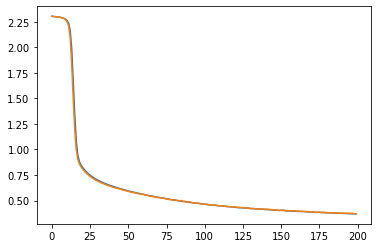

In [ ]:
plt.plot(running_loss[0:epoch+1])
plt.plot(val_running_loss[0:epoch+1])

In [ ]:
train_acc = 0.0
correct = 0.0
count = 0.0

with torch.no_grad():
    for i, data in enumerate(train_loader, 0):
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, pred_label = torch.max(outputs.data, 1)
    for j in range(len(pred_label)):
        if pred_label[j].int() == labels[j]:
            correct += 1
        count += 1

train_acc = correct/count
print("train_acc:",train_acc)



test_acc = 0.0
correct = 0.0
count = 0.0

with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, pred_label = torch.max(outputs.data, 1)
    
    for j in range(len(pred_label)):
        if pred_label[j].int() == labels[j]:
            correct += 1  
        count += 1

test_acc = correct/count
print("test_acc:",test_acc)

train_acc: 0.8701041666666667
test_acc: 0.8125
